Distribución de riqueza y abundancia en el paisaje

In [1]:
import numpy as np
import seaborn, math, os
from matplotlib import pyplot as plt

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
%run ../medidas_biodiversidad.py

In [4]:
%matplotlib inline

// vmax = 10 para riqueza y 20 para biomasa. Comunidad = 100

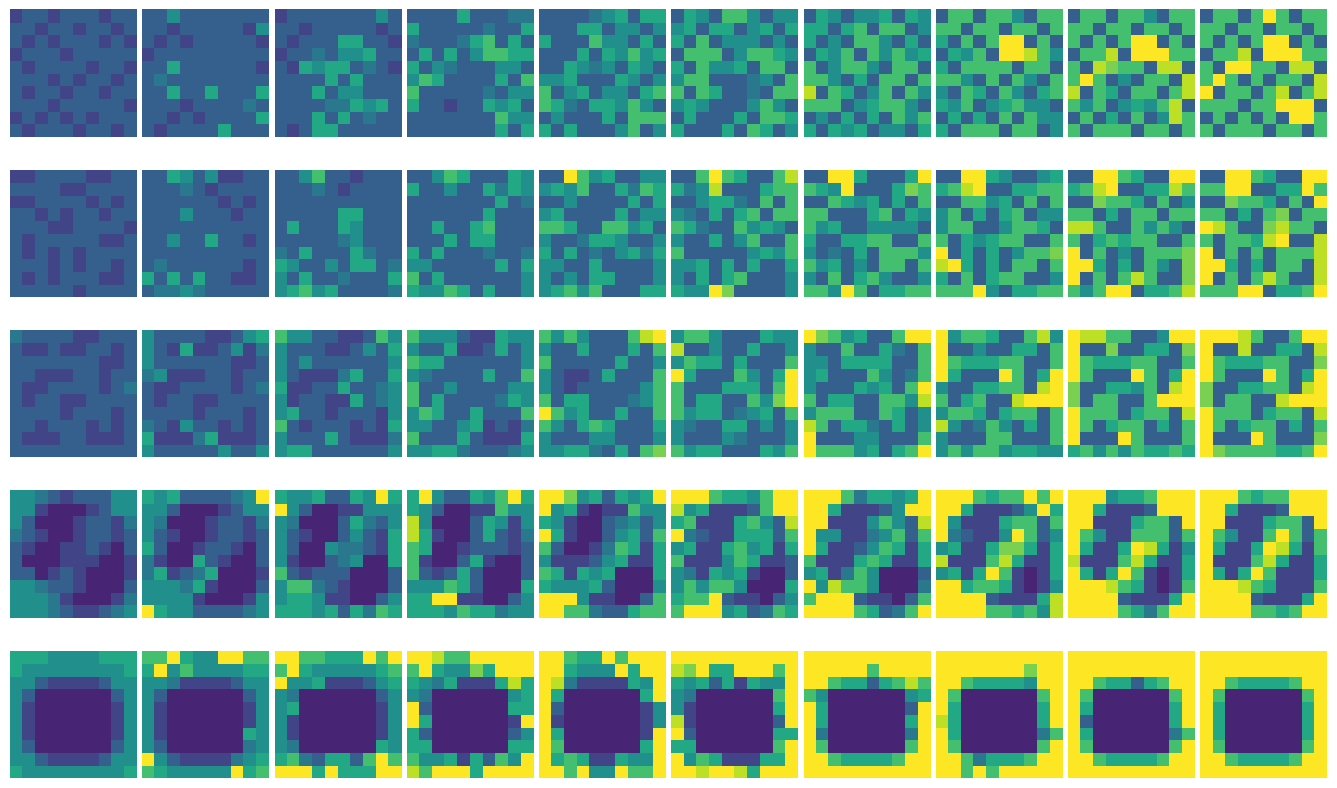

In [58]:
fig = plt.figure(figsize=(17, 10))
gs = gridspec.GridSpec(5, 10)
gs.update(wspace=0.04)
for het in range(5):
    #paisajes = np.load("../paisajes_h{}.npy".format(het))
    paisajes = np.load('../datos/exp2b/exp2b_h{}_c100.npy'.format(het))
    
    for i, datos in enumerate(paisajes):
        riqueza_celda = medidas_por_celda(datos, -1, biomasa_min=.1)[1]
        #biomasa_celda = medidas_por_celda(datos, -1, biomasa_min=0)[0]
        plt.subplot(gs[4-het, i])
        seaborn.heatmap(riqueza_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, vmax=10, square=True, cbar=False, cmap='viridis_r') 

In [48]:
paisajes = np.load('../datos/exp1b/exp1b_h0_c100.npy')
riqueza_celda = medidas_por_celda(paisajes[0], -1, biomasa_min=.1)[1]
riqueza_celda

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  3.,  4.,  4.,  4.,  3.,  3.,  0.],
       [ 3.,  3.,  4.,  5.,  5.,  5.,  5.,  5.,  4.,  3.],
       [ 3.,  4.,  5.,  7.,  7.,  7.,  7.,  7.,  5.,  4.],
       [ 4.,  5.,  6.,  8.,  9.,  9.,  9.,  8.,  6.,  5.],
       [ 4.,  5.,  6.,  8.,  9.,  9.,  9.,  8.,  6.,  5.],
       [ 3.,  4.,  5.,  7.,  7.,  7.,  7.,  7.,  5.,  4.],
       [ 3.,  3.,  4.,  5.,  5.,  5.,  5.,  5.,  4.,  3.],
       [ 0.,  0.,  3.,  3.,  4.,  4.,  4.,  3.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

array([[ 8.,  8.,  7.,  7.,  8.,  8.,  7.,  8.,  8.,  8.],
       [ 7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.],
       [ 6.,  4.,  4.,  7.,  8.,  8.,  8.,  8.,  8.,  7.],
       [ 4.,  3.,  4.,  7.,  8.,  8.,  8.,  8.,  7.,  7.],
       [ 7.,  4.,  7.,  7.,  8.,  8.,  8.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  7.,  7.,  8.],
       [ 7.,  7.,  7.,  8.,  8.,  7.,  8.,  8.,  8.,  7.],
       [ 7.,  7.,  8.,  8.,  8.,  8.,  7.,  8.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  8.]])

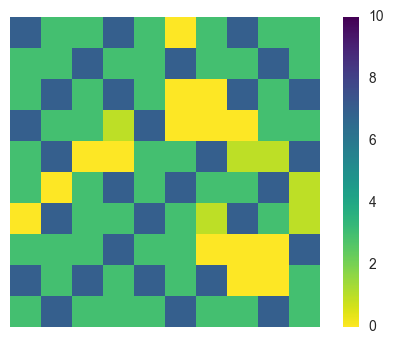

In [60]:
seaborn.heatmap(riqueza_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, vmax=10, square=True, cbar=True, cmap='viridis_r') 